In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from prettytable import PrettyTable
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import classification_report

In [2]:
# path of the file
filepath = "D:\CYBER ATTACK DETECTION PROJECT\DATASET\\Final Dataset for comparision.csv"

In [3]:
# loading the dataset 
df = pd.read_csv(filepath, nrows=10000000)

In [4]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,conn_state_encoded,proto_encoded
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,6,1
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,6,1


In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration            float64
 1   orig_bytes          int64  
 2   resp_bytes          int64  
 3   missed_bytes        float64
 4   orig_pkts           float64
 5   orig_ip_bytes       float64
 6   resp_pkts           float64
 7   resp_ip_bytes       float64
 8   label               object 
 9   misses_bytes        float64
 10  conn_state_encoded  int64  
 11  proto_encoded       int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 915.5+ MB


In [6]:
# statistical measure on dataset

df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,conn_state_encoded,proto_encoded
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,-8.437321e-02,1.824957e+02,2.934570e+00,2.150090e-02,2.002007e+00,2.761713e+02,3.416330e-02,5.571225e+00,-9.927626e-01,5.986300e+00,1.039763e+00
std,4.382422e+01,5.522816e+05,3.698325e+03,1.535074e+01,4.128157e+02,5.638333e+05,6.231040e+00,3.860911e+03,4.932938e+00,4.438511e-01,2.056215e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
max,9.328003e+04,1.744830e+09,1.166102e+07,2.027200e+04,1.305034e+06,1.781371e+09,9.307000e+03,1.207699e+07,5.792000e+03,1.200000e+01,2.000000e+00


In [7]:
df.shape

(10000000, 12)

In [8]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes',
       'conn_state_encoded', 'proto_encoded'],
      dtype='object')

In [9]:
df['label'].value_counts()

PartOfAHorizontalPortScan     6273278
Benign                        1818231
Okiru                         1628670
DDoS                           264133
C&C                              7298
Attack                           6943
C&C-HeartBeat                    1345
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

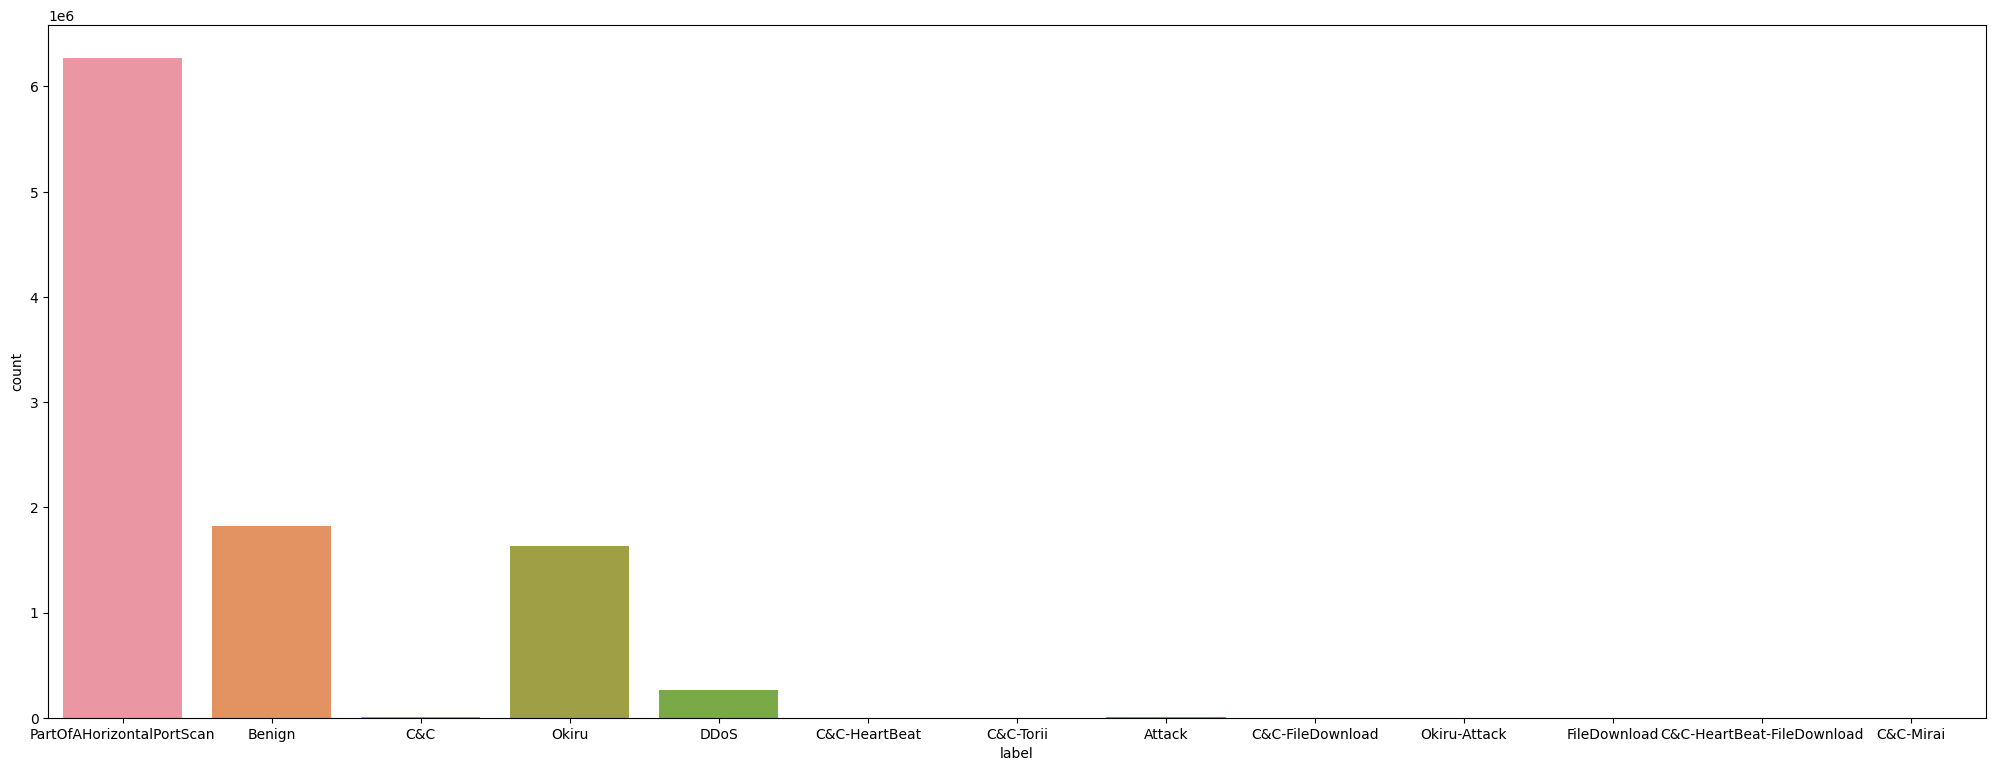

In [10]:
plt.figure(figsize= (25,9))
sns.countplot(x = df['label'])

In [11]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes','proto_encoded', 'conn_state_encoded']

In [12]:
for col in df.columns:
    print(col)

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
misses_bytes
proto_encoded
conn_state_encoded


In [13]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes', 'proto_encoded', 'conn_state_encoded']


In [14]:
df['label'].value_counts()

PartOfAHorizontalPortScan     6273278
Benign                        1818231
Okiru                         1628670
DDoS                           264133
C&C                              7298
Attack                           6943
C&C-HeartBeat                    1345
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [15]:
df['label'].head()

0    PartOfAHorizontalPortScan
1    PartOfAHorizontalPortScan
2    PartOfAHorizontalPortScan
3                       Benign
4                       Benign
Name: label, dtype: object

## Splitting the dataset into features and target

In [16]:
# features
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',   'misses_bytes', 'proto_encoded', 'conn_state_encoded']]

# target
Y = df['label']

In [17]:
# shape of features and terget

print("Shape of features : ",X.shape)
print("Shape of target : ",Y.shape)

Shape of features :  (10000000, 11)
Shape of target :  (10000000,)


In [18]:
scaler = StandardScaler()

scaler.fit(X)
X_standard = scaler.transform(X)

In [19]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
df['label'].value_counts()

PartOfAHorizontalPortScan     6273278
Benign                        1818231
Okiru                         1628670
DDoS                           264133
C&C                              7298
Attack                           6943
C&C-HeartBeat                    1345
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [21]:
start = time.time()
rf = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test)

# Calculate the accuracy, F1 score, recall, and precision of the Random Forest model
rf_acc = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred, average='macro', zero_division=1)
rf_recall = recall_score(Y_test, rf_pred, average='macro', zero_division=1)
rf_precision = precision_score(Y_test, rf_pred, average='macro', zero_division=1)
end = time.time()

rf_time = end - start

In [22]:
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

dt_pred = dt.predict(X_test)


# Evaluate Decision Tree performance
dt_acc = accuracy_score(Y_test, dt_pred)
dt_f1 = f1_score(Y_test, dt_pred,average='macro',  zero_division=1)
dt_recall = recall_score(Y_test, dt_pred,average='macro',  zero_division=1)
dt_precision = precision_score(Y_test, dt_pred,average='macro', zero_division=1)
end = time.time()

dt_time = end - start

In [23]:
start = time.time()

ny = GaussianNB()
ny.fit(X_train, Y_train)

ny_pred = ny.predict(X_test)

ny_acc = accuracy_score(Y_test, ny_pred)
ny_f1 = f1_score(Y_test, ny_pred, average='macro', zero_division=1)
ny_recall = recall_score(Y_test, ny_pred, average='macro', zero_division=1)
ny_precision = precision_score(Y_test, ny_pred, average='macro', zero_division=1)
end = time.time()

ny_time = end - start

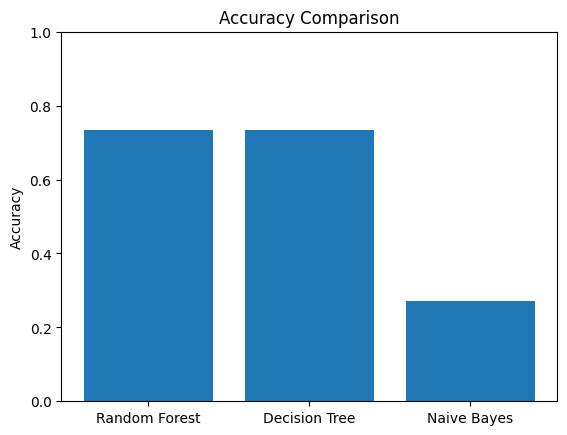

In [24]:
labels = ['Random Forest','Decision Tree', 'Naive Bayes']
accuracies = [rf_acc,dt_acc,ny_acc]
plt.bar(labels, accuracies)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

## Creating comparision table

In [25]:
# create table
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "F1 Score", "Recall", "Precision", "Time"]
# table.add_row(["SVM", svm_acc, svm_f1, svm_recall, svm_precision])
table.add_row(["Random Forest", rf_acc, rf_f1, rf_recall, rf_precision, rf_time])
table.add_row(["Decision Tree", dt_acc, dt_f1, dt_recall, dt_precision, dt_time])
table.add_row(["Navie Bayes", ny_acc, ny_f1, ny_recall, ny_precision, ny_time])

# print table
print(table)

+---------------+-----------+---------------------+---------------------+--------------------+--------------------+
|   Algorithm   |  Accuracy |       F1 Score      |        Recall       |     Precision      |        Time        |
+---------------+-----------+---------------------+---------------------+--------------------+--------------------+
| Random Forest | 0.7349835 |  0.5753612011557193 |  0.5739115490444735 | 0.8152759491199495 | 440.7896525859833  |
| Decision Tree | 0.7349715 | 0.47992299734920846 | 0.47861572098979216 | 0.8029203966052804 | 54.678276777267456 |
|  Navie Bayes  | 0.2710125 | 0.31192730758187254 | 0.41932966583789016 | 0.4426000487996456 | 53.618515968322754 |
+---------------+-----------+---------------------+---------------------+--------------------+--------------------+


## Creating comparision plot graph

In [26]:
# Create comparison graph
algorithms = ['Random Forest', 'Decision Tree', 'Navie Bayes']
accuracy_scores = [rf_acc, dt_acc, ny_acc]
f1_scores = [rf_f1, dt_f1, ny_f1]
recall_scores = [rf_recall, dt_recall, ny_recall]
precision_scores = [rf_precision, dt_precision, ny_precision]
time_cost = [rf_time,dt_time,ny_time]

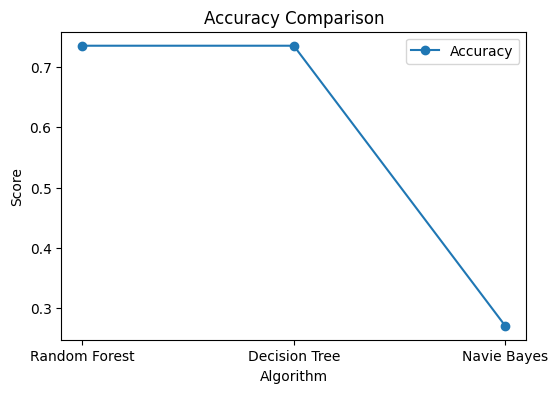

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

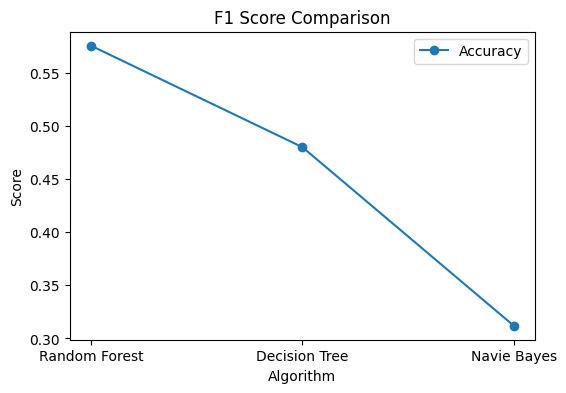

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, f1_scores, marker='o', label='Accuracy')
plt.title('F1 Score Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

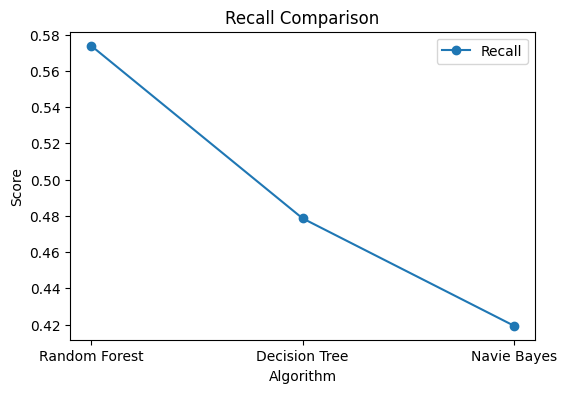

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.title('Recall Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

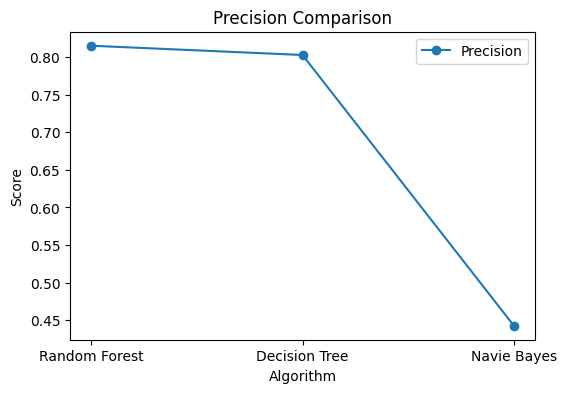

In [30]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.title('Precision Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

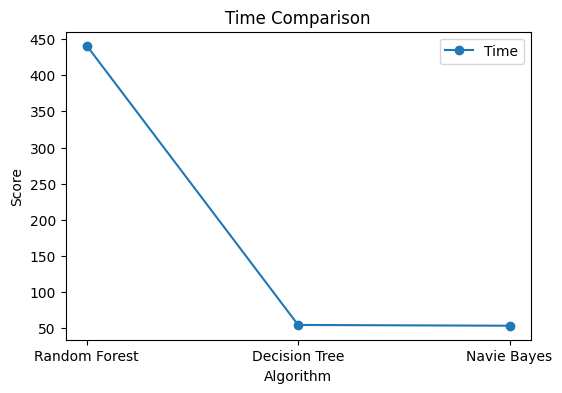

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, time_cost, marker='o', label='Time')
plt.title('Time Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

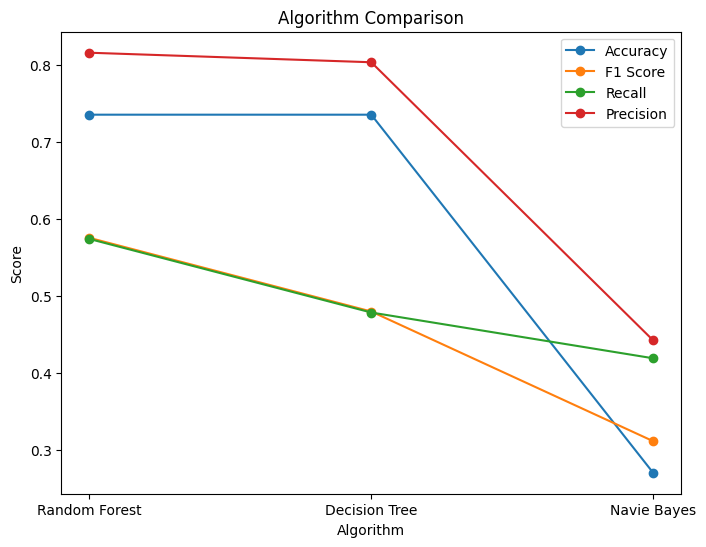

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.plot(algorithms, f1_scores, marker='o', label='F1 Score')
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

## Creating comparision bar graph

In [33]:
models = ['Random Forest', 'Decision Tree', 'Navie Bayes']
accuracy = [rf_acc,  dt_acc, ny_acc]
f1 = [rf_f1, dt_f1, ny_f1]
recall = [rf_recall, dt_recall, ny_recall]
precision = [rf_precision, dt_precision, ny_precision]

In [34]:
x = np.arange(len(models))
width = 0.15

In [35]:
my_list = [accuracy, f1, recall, precision]
my_array = np.array(my_list)

print(my_array.shape)

(4, 3)


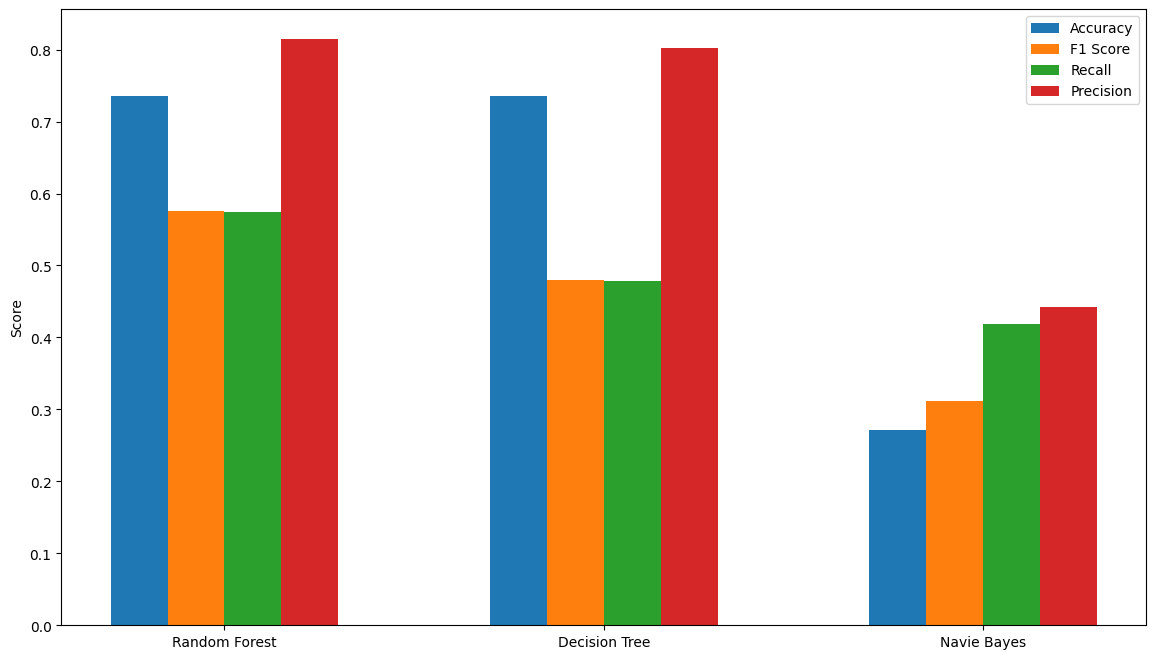

In [36]:
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, f1, width, label='F1 Score')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, precision, width, label='Precision')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

## Classification Report

In [37]:
print('Decision Tree Classifier:')
print(classification_report(Y_test, dt_pred, zero_division=1))

Decision Tree Classifier:
                            precision    recall  f1-score   support

                    Attack       0.99      0.99      0.99      1349
                    Benign       0.78      0.81      0.79    363474
                       C&C       0.99      0.95      0.97      1506
          C&C-FileDownload       0.86      0.86      0.86         7
             C&C-HeartBeat       0.33      0.00      0.01       279
C&C-HeartBeat-FileDownload       1.00      0.00      0.00         1
                 C&C-Torii       0.50      0.14      0.22         7
                      DDoS       0.99      0.05      0.10     53152
              FileDownload       1.00      1.00      1.00         1
                     Okiru       0.47      0.00      0.00    325568
              Okiru-Attack       1.00      0.00      0.00         1
 PartOfAHorizontalPortScan       0.72      0.93      0.82   1254655

                  accuracy                           0.73   2000000
                 mac

In [38]:
print('Random Forest Classifier:')
print(classification_report(Y_test, rf_pred, zero_division=1))

Random Forest Classifier:
                            precision    recall  f1-score   support

                    Attack       0.99      0.99      0.99      1349
                    Benign       0.78      0.81      0.79    363474
                       C&C       1.00      0.95      0.97      1506
          C&C-FileDownload       1.00      1.00      1.00         7
             C&C-HeartBeat       0.33      0.00      0.01       279
C&C-HeartBeat-FileDownload       1.00      1.00      1.00         1
                 C&C-Torii       0.50      0.14      0.22         7
                      DDoS       0.99      0.05      0.10     53152
              FileDownload       1.00      1.00      1.00         1
                     Okiru       0.48      0.00      0.00    325568
              Okiru-Attack       1.00      0.00      0.00         1
 PartOfAHorizontalPortScan       0.72      0.93      0.82   1254655

                  accuracy                           0.73   2000000
                 mac

In [39]:
print('Navie Bayes Classifier:')
print(classification_report(Y_test, ny_pred, zero_division=1))

Navie Bayes Classifier:
                            precision    recall  f1-score   support

                    Attack       0.64      0.86      0.73      1349
                    Benign       0.15      0.00      0.00    363474
                       C&C       0.04      0.00      0.00      1506
          C&C-FileDownload       1.00      0.86      0.92         7
             C&C-HeartBeat       1.00      0.00      0.00       279
C&C-HeartBeat-FileDownload       0.50      1.00      0.67         1
                 C&C-Torii       0.17      0.14      0.15         7
                      DDoS       0.44      0.00      0.00     53152
              FileDownload       0.50      1.00      0.67         1
                     Okiru       0.19      1.00      0.33    325568
              Okiru-Attack       0.00      0.00      0.00         1
 PartOfAHorizontalPortScan       0.67      0.17      0.27   1254655

                  accuracy                           0.27   2000000
                 macro

## Making Y_train and dt_pred same number of sample

In [40]:
print(Y_train.shape)
print(rf_pred.shape)

(8000000,)
(2000000,)


In [41]:
print(Y_train.shape)
print(dt_pred.shape)

(8000000,)
(2000000,)


In [42]:
print(Y_train.shape)
print(ny_pred.shape)

(8000000,)
(2000000,)


In [43]:
Y_train = Y_train[:rf_pred.shape[0]]
Y_train = Y_train[:dt_pred.shape[0]]
Y_train = Y_train[:ny_pred.shape[0]]


In [44]:
# print(Y_train.shape)
# print(rf_pred.shape)

In [45]:
# print(Y_train.shape)
# print(dt_pred.shape)

In [46]:
# print(Y_train.shape)
# print(ny_pred.shape)

##                                                              Confusion Matrix

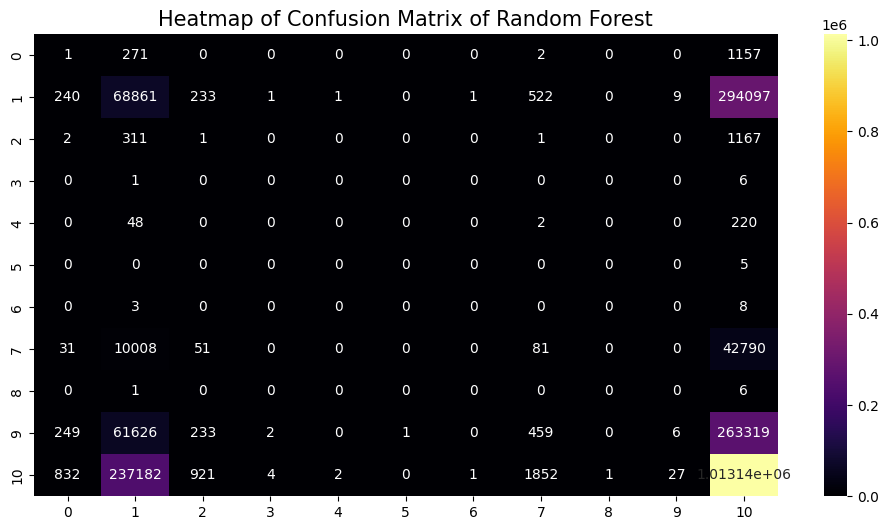

In [47]:
plt.figure(figsize = (12,6))
cm = confusion_matrix(Y_train, rf_pred)
plt.title("Heatmap of Confusion Matrix of Random Forest", fontsize = 15)
sns.heatmap(cm, annot = True, cmap='inferno', fmt='g')
plt.show()

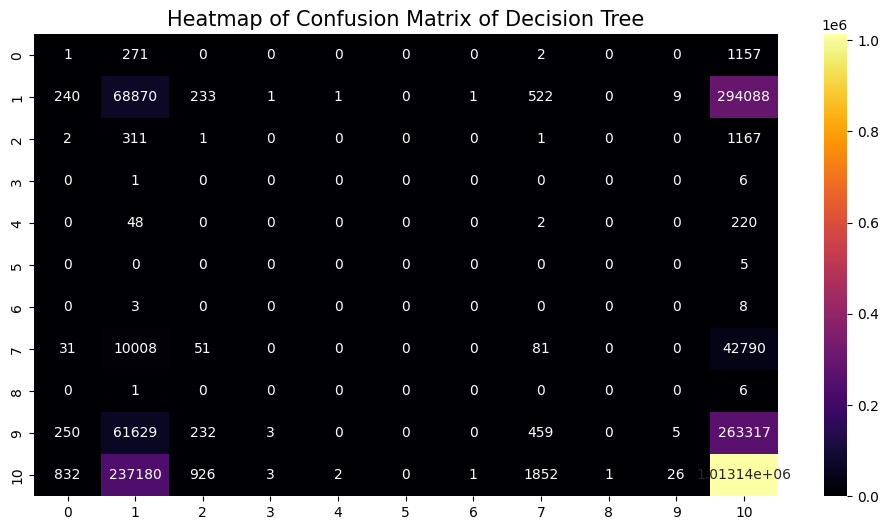

In [48]:
plt.figure(figsize = (12,6))
cm = confusion_matrix(Y_train, dt_pred)
plt.title("Heatmap of Confusion Matrix of Decision Tree", fontsize = 15)
sns.heatmap(cm, annot = True, cmap='inferno', fmt='g')
plt.show()

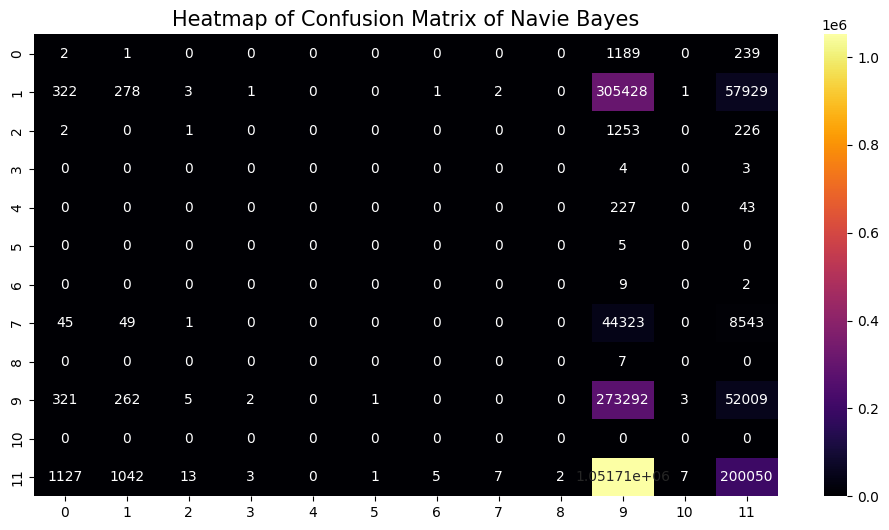

In [49]:
plt.figure(figsize = (12,6))
cm = confusion_matrix(Y_train, ny_pred)
plt.title("Heatmap of Confusion Matrix of Navie Bayes", fontsize = 15)
sns.heatmap(cm, annot = True, cmap='inferno', fmt='g')
plt.show()